In [5]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import matplotlib.pyplot as plt
import pandas as pd
import collections
import string
%matplotlib inline

from cipher.keyword_cipher import *
from cipher.column_transposition import *
from cipher.railfence import *
from support.utilities import *
from support.text_prettify import *
from support.language_models import *
from support.plot_frequency_histogram import *

c4a = open('4a.ciphertext').read()
c4b = open('4b.ciphertext').read()

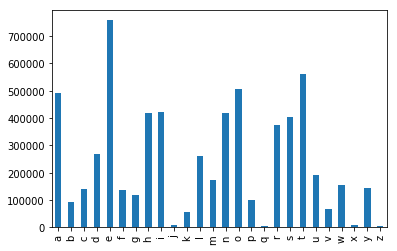

In [2]:
freqs = pd.Series(english_counts)
freqs.plot(kind='bar')

In [3]:
c4bs = sanitise(c4b)
c4bs

'prsaoegerauiadmwehdnisnrasawuaaessrefgdosogvorbeeeaartesctdfmenuibrttlmeytumtmeuaikwhutkwerwahmnpwraeesononesebatoihacineetbrotadaktgfeesyioflttlstiiaeosvieonsrrtaupmnnoaencocnuvrsclvdrgctaiihriciaihrsduomrlemcrngleomarfhiuewhalcsasracufrawwsmehulstoaohceletmtoilsepdmumtptrslyrhhntpanwpmoadppdwbeseoassltmlpesletuncorerlclitaosvsiniifwseafortaaduyenenonnsopfhontwkoertcslyvoeiohlufoeioetsthtsbreneveaouepgieesobduorsfeercdyadutaepeadrdigseebfuoggopogalyfewsoeemdntohrebhaaesneworgnfiaulnlwadueodcotrargvuenewhiertlauilmsoniotmuinewaiuewloerstttisdrsasnussiesmerdhetryrhpnlrtereadmredebnntrnenwmoutrdosaneowomcgidciasaontiioiascesissupcrmoybrineyweelaylewtyrtilhsto'

In [6]:
key_a, score = keyword_break_mp(c4a)
key_a, score

(('stern', <KeywordWrapAlphabet.from_largest: 3>), -830.5838133421847)

In [7]:
print(prettify(keyword_decipher(sanitise(c4a), key_a[0], key_a[1])))

harry we completed the survey and you are not going to believe what we found behind the false
bulkhead in the stern there was a large pumping station connected to a number of sea facing outlets
it looks like a scuttling valve system similar to the ones used on u boats in world war two icant
understand why they would goto so much effort when they could have scuttled her at anytime with a
small quantity of plastic explosive the team back at nsa have run some analytics on the remaining
text files we extracted from the servers onboard these ciphers are going to be pretty hard to crack
the attached report has frequency analysis matching usual english text so we can assume that the
sender was a native speaker did you have any thoughts on what the nautilus system might have been or
what it was for


In [8]:
key_b, score = column_transposition_break_mp(c4bs)
key_b, score

(((6, 0, 1, 7, 9, 4, 2, 3, 5, 8, 10), False, True), -1777.161911681522)

In [9]:
print(prettify(sanitise(column_transposition_decipher(sanitise(c4bs), key_b[0], 
                                                              fillcolumnwise=key_b[1],
                                                              emptycolumnwise=key_b[2]))))

et et mlpdshgnbralwrrauiur tep as gsl di ocpedacnscbtsesuotut ira la lee a so at dy de og is as
tavrtdeiioalkoducrhe hom tein oarscnegigctuimetyfo so rice lite her a aire iue leer dad tom sub rg
mihm it yfflvwhetamioucuer to seo e oleh sri cu fig in ddy lea log ten urs site oawioheikttpohsmpps
wlsosinrndshstgverll muut has ra erupt it lit smt mck is yn lace trw a bfi awrr pm eere i uunet or
oe wfi a gary ws nsw lal dsb aveo smee mlr hive essor yim eee a osmer n no amf nrad hep no do ie re
hywsunroffbnwrretttg hn tear po amd in peet gh au out ale air di serna sue eu now
nwyopebyegheplnmshew van me on o an aol w own nbae irc mateo de nubs odys a usoe eau pre e on n west
ptbnrenlerrdiacswsoa a dwl to foo ea cob hoc erp rr uses in egf st fast hurn hterneoavcfotsaeocrd
int cwo a is y at it wwsncauwsdsoseldlkdf mm levu norm ect


In [10]:
key_b, score = column_transposition_break_mp(c4bs, fitness=Ptrigrams)
key_b, score

(((4, 8, 0, 6, 9, 3, 1, 2, 5, 7, 10), False, True), -2823.7851213306785)

In [11]:
print(prettify(sanitise(column_transposition_decipher(sanitise(c4bs), key_b[0], 
                                                              fillcolumnwise=key_b[1], 
                                                              emptycolumnwise=key_b[2]))))

te tmpl dsehgbralrwranuirtep sag sul doc pea dc nisc tses out ub tial a lee as road yd egoist as avr
ted ii to ako durch el hote in a or smc n gig cut i meet fo soir cey lie her a air te ie leed radu
to sub rmg ihmmiyfflwvhettaiouc eur tmo so eol hes re ic fig id nd yule log tn eur ass teoa
iwohieittposhmpkpsl so snirnwdsstgvrellhmut has are ru up it list mttmcisynalcektrabfi war rwp mere
iuu nee too ew fai garry sns wall dwsbveosememalrivees so rhy ieee a some mr no am frn adn he no do
eire phys un rf of bwnwrettgthnrterpo admin a petg hao uu tea laird sie renau eeuonwnswypebygeheo
plm she vw ann me no a no al woo wnba eric mn a to den bus oed yau so eea us pre on new step tn rene
lrrbdicswsaoadawl of ooaecotbhcerprrusoes neg ft sfa is turn he trn he ovc fost aea ord inc two cas
ya ttiw wisc au wds sons ldlkfdmmelvunomrecet


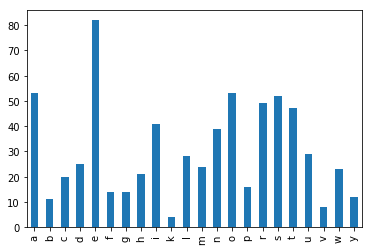

In [12]:
freqs_4b = pd.Series(collections.Counter([l.lower() for l in c4b if l in string.ascii_letters]))
freqs_4b.plot(kind='bar')

In [13]:
railfence_break(c4bs)

(5, -1581.9784460662272)

In [14]:
print(prettify(railfence_decipher(c4bs, 5)))

phase four the decks were cleared by two am and the mounting plates were prepared and measured
mounting points were assembled by four am though owing to the approaching dawn deployment of seabird
was postponed and we embarked onstage two of seahorse assembly with camouflage plates installed we
set to cruising in case of air or sea surveillance following standard routes to avoid suspicion
monitoring of airwaves gave no cause for concern but we have raised security levels and are using a
column transposition cipher for this communication with keyword seabird future comms will relyon
even more security tonight will be used for more sea trials of the nautilus system while the
assembly crew rest and the survey team carryout further mapping we will resume the seahorse build at
dusk tomorrow
